In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Customertravel.csv')

In [6]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [7]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

## NO NULL VALUES PRESENT IN THE DATASET

In [8]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
categoric_features=[features for features in df.columns if df[features].dtype=='O']

print(numeric_features)
print(categoric_features)

['Age', 'ServicesOpted', 'Target']
['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']


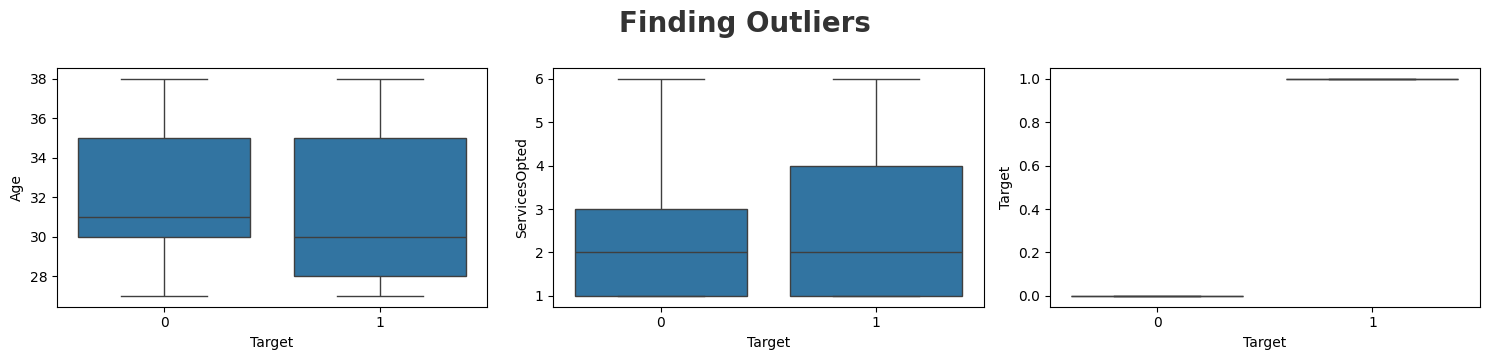

In [11]:
plt.figure(figsize=(15,15))
plt.suptitle("Finding Outliers",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x='Target',y=numeric_features[i],data=df)
    plt.tight_layout()

plt.show()

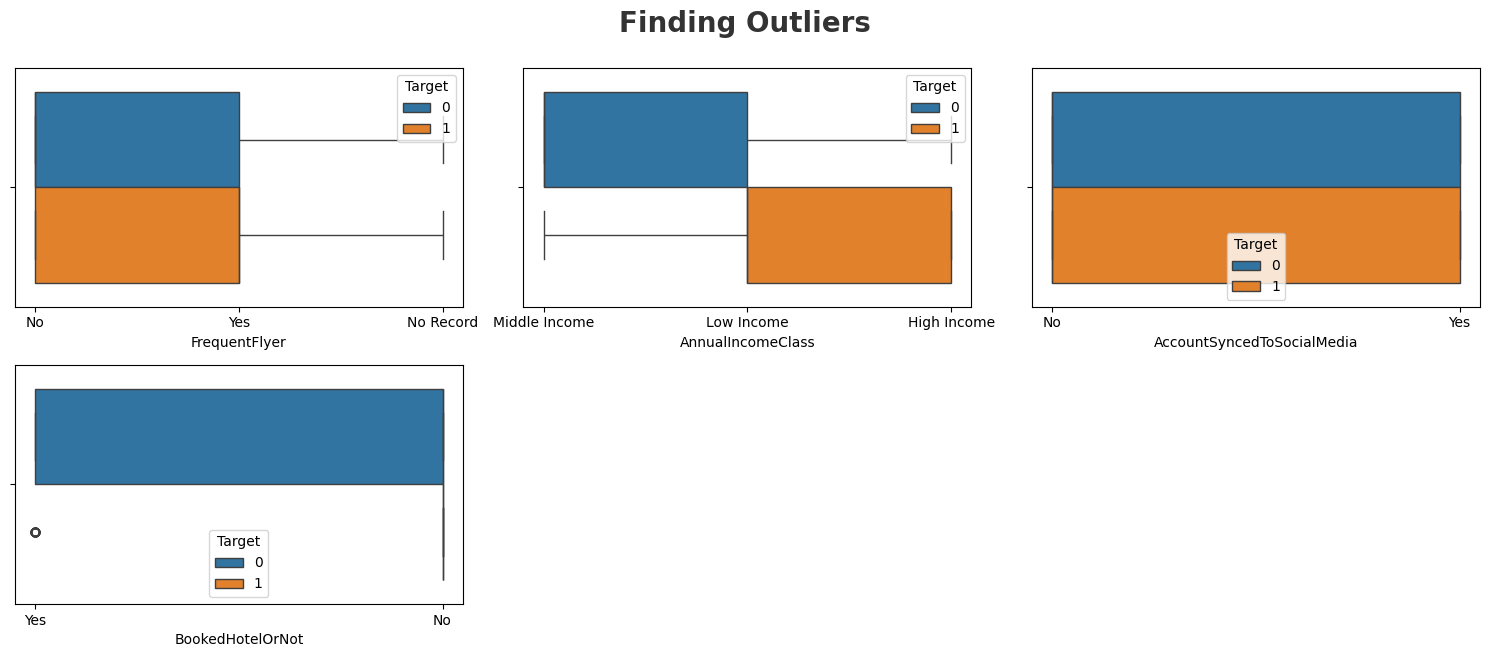

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle("Finding Outliers",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(categoric_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=categoric_features[i],hue='Target',data=df)
    plt.tight_layout()

plt.show()

## THERE ARE NO OUTLIERS IN THE DATASET

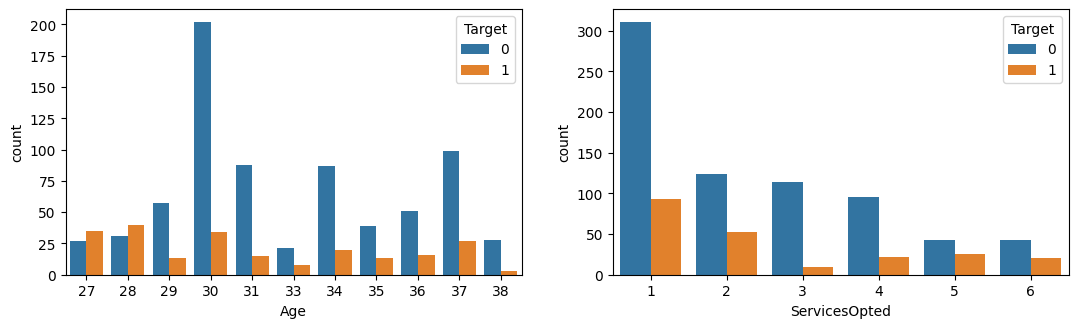

In [24]:
num_cols=['Age', 'ServicesOpted']
plt.figure(figsize=(20,20))
for i in range(0,len(num_cols)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=num_cols[i],hue='Target',data=df)
plt.show()

## As seen in the graphs ages 30,28 & 27 are more likely to churn
## As seen in the second graph customers who opted services for 1 year are most likely to churn

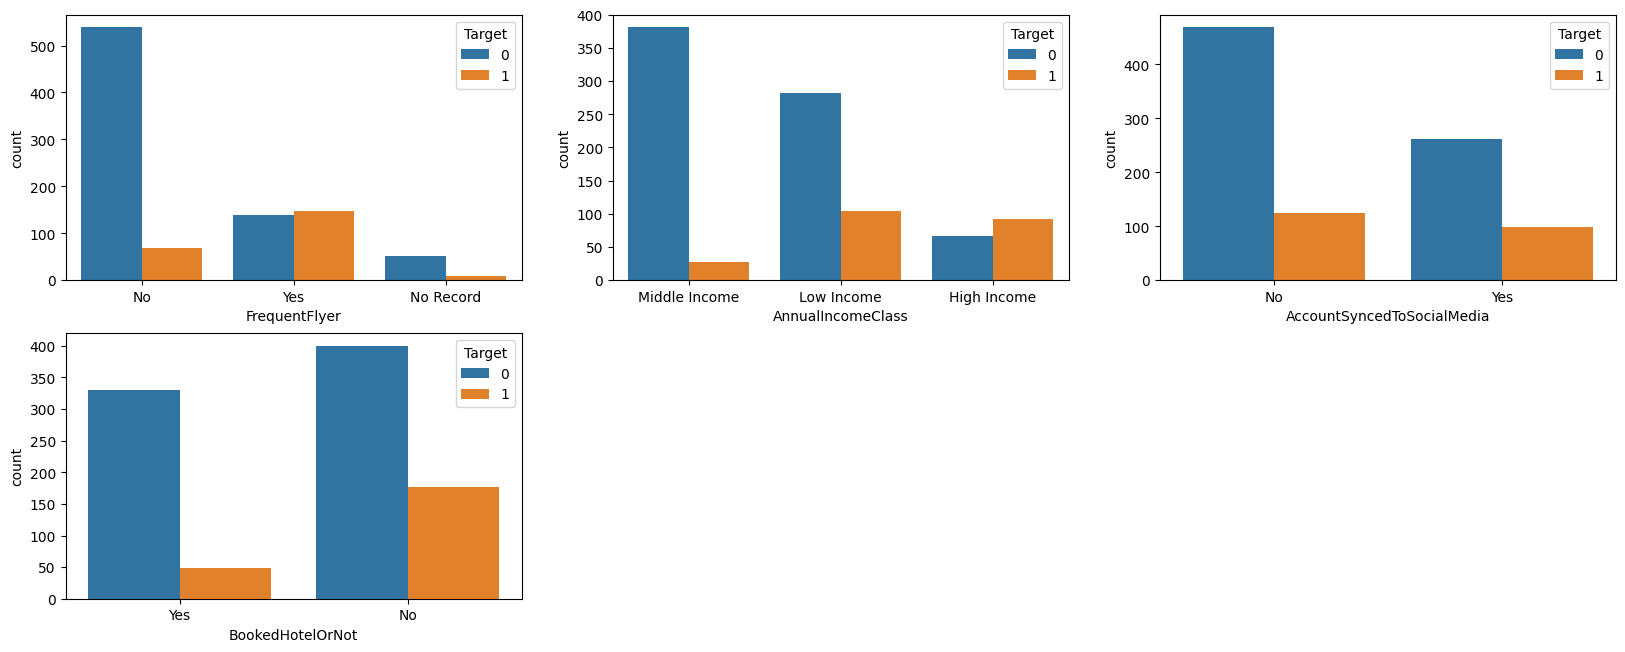

In [25]:
plt.figure(figsize=(20,20))
for i in range(0,len(categoric_features)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=categoric_features[i],hue='Target',data=df)
plt.show()

## Frequent flyer are most likely to churn
## Customers with low income are most likely to churn
## Accounts synced to social media are more likely to churn
## customers who didnot book hotels are most likely to churn

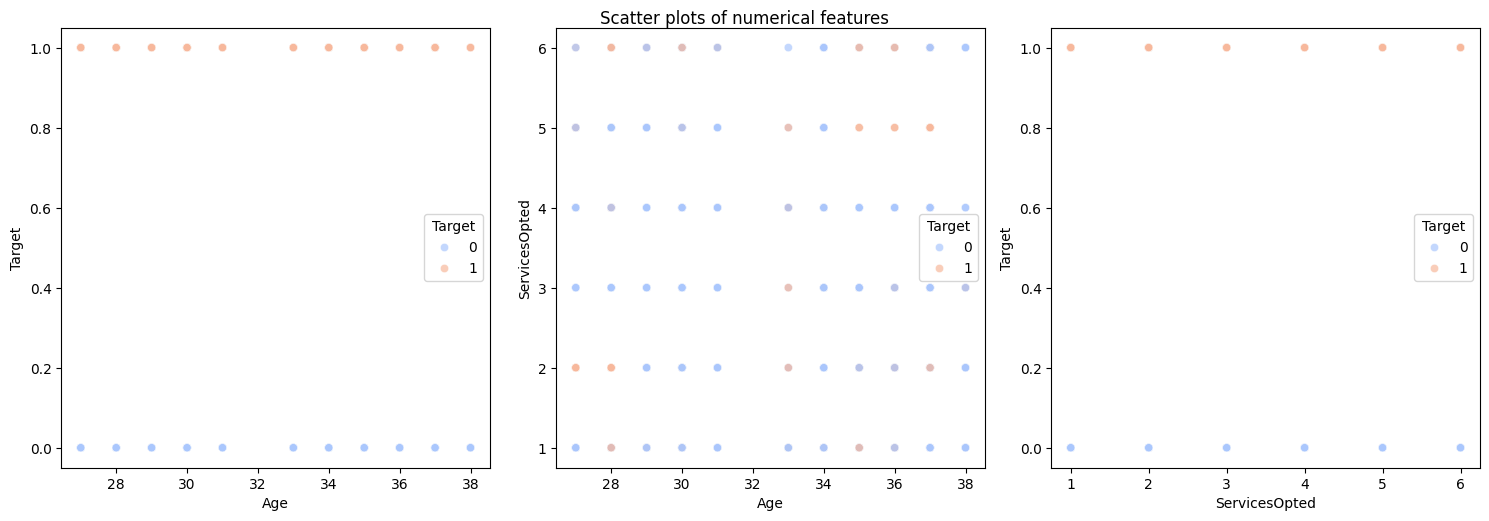

In [32]:
plt.figure(figsize=(15,15))
plt.suptitle("Scatter plots of numerical features")

plt.subplot(3,3,1)
sns.scatterplot(x='Age',y='Target',hue='Target',palette='coolwarm',data=df,alpha=0.7)
plt.tight_layout()

plt.subplot(3,3,2)
sns.scatterplot(x='Age',y='ServicesOpted',hue='Target',palette='coolwarm',data=df,alpha=0.7)
plt.tight_layout()

plt.subplot(3,3,3)
sns.scatterplot(x='ServicesOpted',y='Target',hue='Target',palette='coolwarm',data=df,alpha=0.7)
plt.tight_layout()

plt.show()

## Observations:
## Age vs Target: Both classes (0 and 1) are fairly evenly distributed across the age range.
## Age vs ServicesOpted: No strong relationship is visible between age and services opted. Both target classes are spread throughout different service levels.
## ServicesOpted vs Target: The plot shows some variation across different service levels, but no clear linear pattern is apparent.


In [34]:
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [37]:
encoded_df=df.copy()
encoded_df['FrequentFlyer']=encoded_df['FrequentFlyer'].map({'Yes':1,'No':0})
encoded_df['AnnualIncomeClass']=encoded_df['AnnualIncomeClass'].map({'Low Income':0,'Middle Income':1,'High Income':3})
encoded_df['AccountSyncedToSocialMedia']=encoded_df['AccountSyncedToSocialMedia'].map({'Yes':1,'No':0})
encoded_df['BookedHotelOrNot']=encoded_df['BookedHotelOrNot'].map({'Yes':1,'No':0})

In [38]:
encoded_df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0.0,1,6,0,1,0
1,34,1.0,0,5,1,0,1
2,37,0.0,1,3,1,0,0
3,30,0.0,1,2,0,0,0
4,30,0.0,0,1,0,0,0


## Encoded data

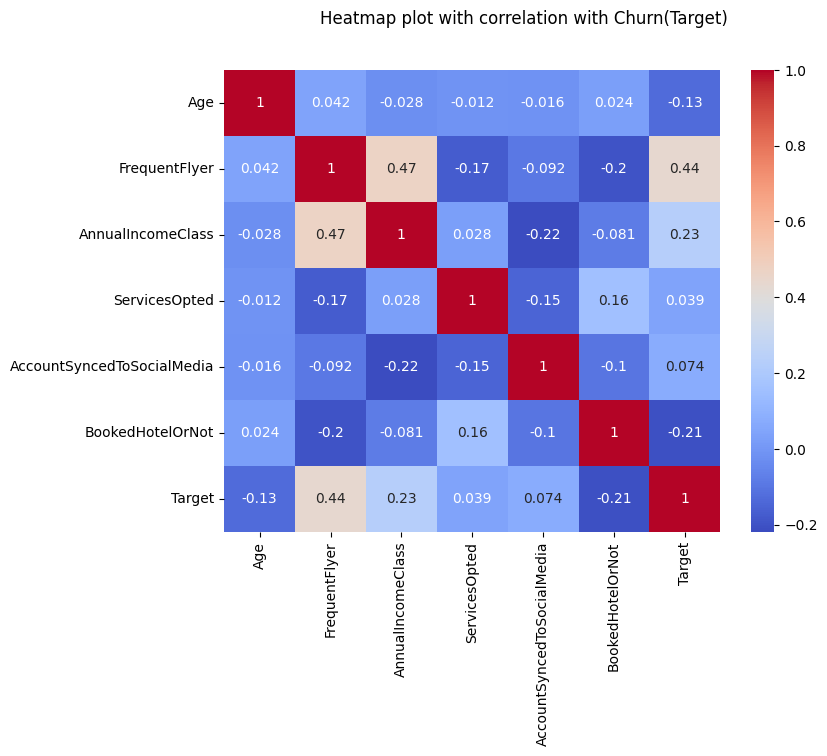

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(encoded_df.corr(),annot=True,cmap='coolwarm')
plt.suptitle("Heatmap plot with correlation with Churn(Target)")
plt.show()

## Target Correlations:

## FrequentFlyer (0.44): This has the highest positive correlation with the target, meaning frequent flyers are more likely to churn.
## AnnualIncomeClass (0.23): Customers with higher or lower income classes may have a slightly higher tendency to churn.
## BookedHotelOrNot (-0.21): There is a negative correlation here, suggesting that customers who book hotels are less likely to churn.
## Age (-0.13): A mild negative correlation, indicating that older customers are slightly less likely to churn.